<a href="https://colab.research.google.com/github/basartimucin/MPA-MLF/blob/main/Week_5_Lab_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dropout layers added three dense layers with 512, 256, and 128

The activation function for the dense layers changed to 'relu'

Optimizer has been changed to Adam

Learning rate decreased

Early stopping implemented

Batch size decreased

Epoch increased.

Epoch 1/100
157/157 [==============================] - 3s 9ms/step - loss: 2.1808 - accuracy: 0.1845 - val_loss: 1.9826 - val_accuracy: 0.3011
Epoch 2/100
157/157 [==============================] - 1s 7ms/step - loss: 1.9999 - accuracy: 0.2661 - val_loss: 1.8944 - val_accuracy: 0.3263
Epoch 3/100
157/157 [==============================] - 1s 9ms/step - loss: 1.9295 - accuracy: 0.2961 - val_loss: 1.8382 - val_accuracy: 0.3438
Epoch 4/100
157/157 [==============================] - 1s 6ms/step - loss: 1.8825 - accuracy: 0.3183 - val_loss: 1.7901 - val_accuracy: 0.3625
Epoch 5/100
157/157 [==============================] - 1s 6ms/step - loss: 1.8465 - accuracy: 0.3311 - val_loss: 1.7552 - val_accuracy: 0.3806
Epoch 6/100
157/157 [==============================] - 1s 6ms/step - loss: 1.8186 - accuracy: 0.3452 - val_loss: 1.7280 - val_accuracy: 0.3905
Epoch 7/100
157/157 [==============================] - 1s 6ms/step - loss: 1.8002 - accuracy: 0.3520 - val_loss: 1.7219 - val_accuracy: 0.3878

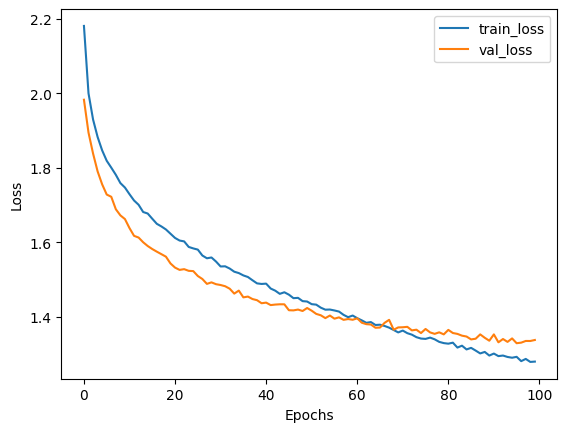

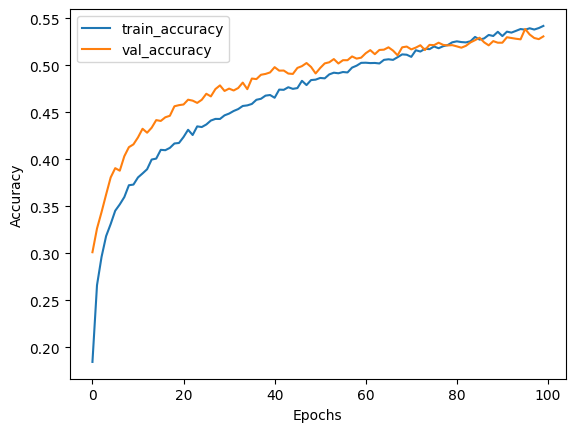

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.regularizers import l2
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import numpy as np

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X_train_scaled = X_train.astype('float32') / 255.0
X_test_scaled = X_test.astype('float32') / 255.0

y_train_encoded = to_categorical(y_train, num_classes=10)
y_test_encoded = to_categorical(y_test, num_classes=10)

model = Sequential()
model.add(Flatten(input_shape=(32, 32, 3)))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))


optimizer = Adam(learning_rate=0.0001)

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True)

history = model.fit(X_train_scaled, y_train_encoded, epochs=100, batch_size=256,
                    validation_split=0.2, callbacks=[early_stopping], verbose=1)

score = model.evaluate(X_test_scaled, y_test_encoded, verbose=0)
print('Test loss:', score[0])
print(f'Test accuracy: {score[1]*100} %')

plt.figure()
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure()
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
